In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
low_memory=False
sns.set(color_codes=True)
import sklearn
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler,QuantileTransformer
from sklearn.cross_validation import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC

In [25]:
raw_data = pd.read_csv('C:\\Users\\soumya\\Documents\\MACHINE_LEARNING\\Ind_Project\\LendingClub2012to2013.csv')
df_filtered = pd.read_csv('C:\\Users\\soumya\\Documents\\MACHINE_LEARNING\\Ind_Project\\df_filtered.csv')



C:\Users\soumya\Anaconda3\anaconda\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [26]:
def fico_transform(fico_range_high):
    if 640 < fico_range_high <= 670:
        return '640-670'
    elif 670 < fico_range_high <= 700:
        return '670-700'
    elif 700 < fico_range_high <= 730:
        return '700-730'
    elif 730 < fico_range_high <= 760:
        return '730-760'
    elif 760 < fico_range_high <= 790:
        return '760-790'
    elif 790 < fico_range_high <= 820:
        return '790-820'
    return '820-850'

raw_data['fico_transformed'] = raw_data['fico_range_high'].apply(fico_transform)

In [27]:
#raw_data['fico_transformed']

In [28]:
raw_data.to_csv('C:\\Users\\soumya\\Documents\\MACHINE_LEARNING\\Ind_Project\\raw_data.csv')

In [29]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188183 entries, 0 to 188182
Columns: 116 entries, id to fico_transformed
dtypes: float64(90), object(26)
memory usage: 166.5+ MB


In [30]:
from collections import Counter
print (Counter(raw_data.loan_amnt != raw_data.funded_amnt))

Counter({False: 188116, True: 67})


In [31]:
print (raw_data.emp_title.value_counts().head())
print (raw_data.emp_title.value_counts().tail())
raw_data.emp_title.unique().shape

Teacher             833
Manager             666
US Army             491
RN                  389
Registered Nurse    356
Name: emp_title, dtype: int64
Healthy Home Market                 1
GSF Saefway                         1
Bakersfield City School District    1
Provisioning Technician             1
The Brunswick Group                 1
Name: emp_title, dtype: int64


(115188,)

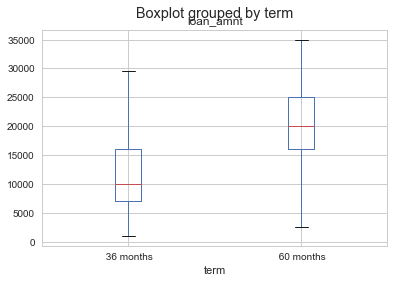

In [32]:
raw_data.boxplot(column='loan_amnt', by='term')

C:\Users\soumya\Anaconda3\anaconda\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


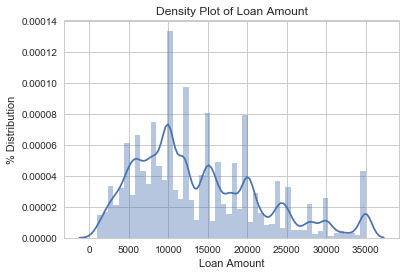

In [35]:
# Density Distribution of Loan Amount
sns.set_style("whitegrid")
ax=sns.distplot(df_filtered.loan_amnt)
ax.set(xlabel='Loan Amount', 
       ylabel='% Distribution',title='Density Plot of Loan Amount')

plt.legend();

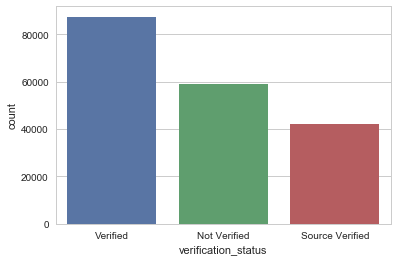

In [52]:
axs = sns.countplot(x='verification_status',data=raw_data)
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'int_rate'